In [3]:
def gdp_inflation_adjusted(a,b,c,d,amount):
    import matplotlib.pyplot as plt
    import csv
    
    years = list(range(2023-amount,2023))
    
    reader = csv.reader(open('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6224532.csv','r'), delimiter = ',')
    for i in reader:
   
        if a in i:
            a_gdp = [float(j) for j in i[4:-1]]
        if b in i:
            b_gdp = [float(j) for j in i[4:-1]]
        if c in i:
            c_gdp = [float(j) for j in i[4:-1]]
        if d in i:
            d_gdp = [float(j) for j in i[4:-1]]
    
    reader = csv.reader(open('API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_213184_inflation.csv','r'), delimiter = ',')
    for i in reader:
        if a in i:
            a_i = [float(j) for j in i[4:] if j != '']
        if b in i:
            b_i = [float(j) for j in i[4:] if j != '']
        if c in i:
            c_i = [float(j) for j in i[4:] if j != '']
        if d in i:
            d_i = [float(j) for j in i[4:] if j != '']
            
    a_gdp = a_gdp[63-amount:]
    b_gdp = b_gdp[63-amount:]
    c_gdp = c_gdp[63-amount:]
    d_gdp = d_gdp[63-amount:]
    
    a_i = a_i[36-amount:]
    b_i = b_i[36-amount:]
    c_i = c_i[36-amount:]
    d_i = d_i[36-amount:]
    
    a_gdpi = []
    b_gdpi = []
    c_gdpi = []
    d_gdpi = []
    
    for i in range(len(a_gdp)):
        year = 1987 + i
        if year == 1987:
            a_gdpi.append(a_gdp[i])
            b_gdpi.append(b_gdp[i])
            c_gdpi.append(c_gdp[i])
            d_gdpi.append(d_gdp[i])
        else:
            ci_1 = 1
            ci_2 = 1
            ci_3 = 1
            ci_4 = 1
            for j in range(year - 1987):
                ci_1 *= (1 + a_i[j]/100)
                ci_2 *= (1 + b_i[j]/100)
                ci_3 *= (1 + c_i[j]/100)
                ci_4 *= (1 + d_i[j]/100)
            
            a_gdpi.append(a_gdp[i] / ci_1)
            b_gdpi.append(b_gdp[i] / ci_2)
            c_gdpi.append(c_gdp[i] / ci_3)
            d_gdpi.append(d_gdp[i] / ci_4)
    
    
    fig, ax = plt.subplots(figsize=(11,8))
    ax.plot(years, a_gdpi,label=a)
    ax.plot(years, b_gdpi,label=b)
    ax.plot(years, c_gdpi,label=c)
    ax.plot(years, d_gdpi,label=d)
    plt.legend(loc=2, prop={'size': 12})
    plt.ylabel("GDP Ten-Trillions")
    plt.xlabel('year')
    plt.title(f'GDP growth in period {2022-amount} to 2022 for {a}, {b}, {c} and {d}')
    plt.text(2022, a_gdpi[-1], f' ${round(a_gdpi[-1]/1e12,2)}*10^12')
    plt.text(2022, b_gdpi[-1], f' ${round(b_gdpi[-1]/1e12,2)}*10^12')
    plt.text(2022, c_gdpi[-1], f' ${round(c_gdpi[-1]/1e12,2)}*10^12')
    plt.text(2022, d_gdpi[-1], f' ${round(d_gdpi[-1]/1e12,2)}*10^12')
    plt.show() 
    plt.show()

    avg_rate_a = []
    avg_rate_b = []
    avg_rate_c = []
    avg_rate_d = []
    
    for i in range(len(a_gdp)-1):
        avg_rate_a.append((a_gdpi[i+1]- a_gdpi[i])/a_gdpi[i]*100)
        avg_rate_b.append((b_gdpi[i+1]- b_gdpi[i])/b_gdpi[i]*100)
        avg_rate_c.append((c_gdpi[i+1]- c_gdpi[i])/c_gdpi[i]*100)
        avg_rate_d.append((d_gdpi[i+1]- d_gdpi[i])/d_gdpi[i]*100)
    
    rates = [avg_rate_a, avg_rate_b, avg_rate_c, avg_rate_d]
    means =[sum(i)/len(i) for i in rates]
    
    countries = [a,b,c,d]
    
    fig, ay = plt.subplots(figsize=(11,8))
    ay.bar(countries,means, color ='maroon')
    plt.ylabel("Average Percentage GDP Growth per year")
    plt.xlabel('Economies')
    plt.title(f"Average growth in GDP over the period {2022-amount} to 2022")
    plt.show()
    
    
    for i in range(10):
        years.append(years[-1]+1)
        a_gdpi.append(a_gdpi[-1]+a_gdpi[-1]*means[0]/100)
        b_gdpi.append(b_gdpi[-1]+b_gdpi[-1]*means[1]/100)
        c_gdpi.append(c_gdpi[-1]+c_gdpi[-1]*means[2]/100)
        d_gdpi.append(d_gdpi[-1]+d_gdpi[-1]*means[3]/100)
    
    fig, ax = plt.subplots(figsize=(11,8))
    ax.plot(years, a_gdpi,label=a)
    ax.plot(years, b_gdpi,label=b)
    ax.plot(years, c_gdpi,label=c)
    ax.plot(years, d_gdpi,label=d)
    plt.legend(loc=2, prop={'size': 12})
    plt.ylabel("GDP Ten-Trillions")
    plt.xlabel('year')
    plt.title(f'GDP growth in period {2022-amount} to 2022 for {a}, {b}, {c} and {d}')
    plt.text(2022, a_gdpi[-1], f'                                             ${round(a_gdpi[-1]/1e12,2)}*10^12')
    plt.text(2022, b_gdpi[-1], f'                                             ${round(b_gdpi[-1]/1e12,2)}*10^12')
    plt.text(2022, c_gdp[-1],  f'                                             ${round(c_gdpi[-1]/1e12,2)}*10^12')
    plt.text(2022, c_gdpi[-1], f'                                             ${round(d_gdpi[-1]/1e12,2)}*10^12')
    plt.show() 


        
    
        
        
        
    print('this is gdp adjusted for inflation since 1987 therefore it is held in constant dollars since 1987 prices')
    
    
    

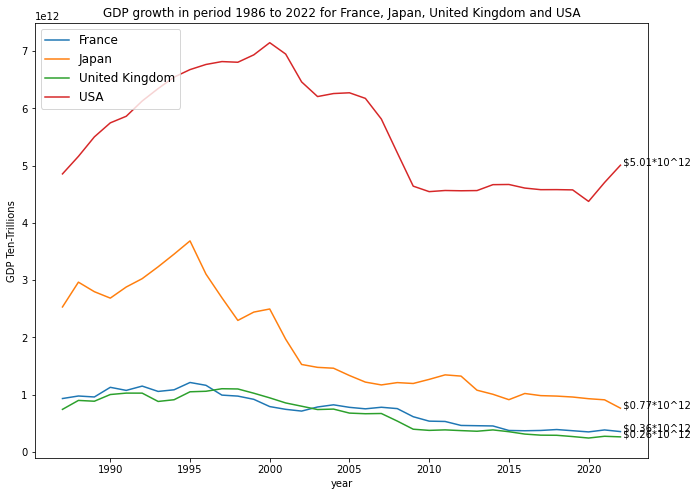

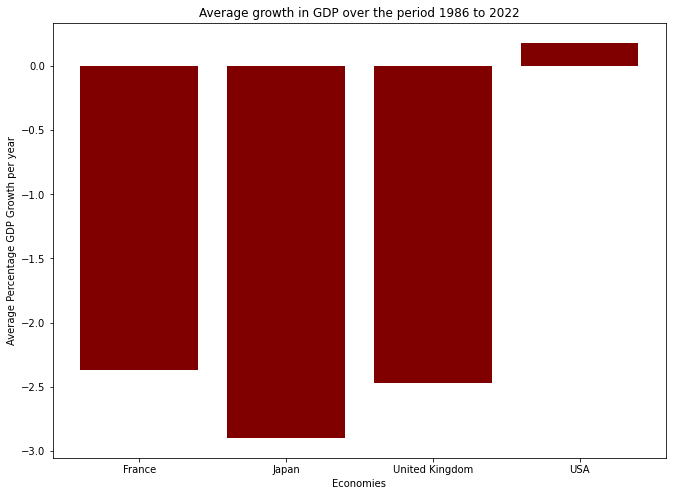

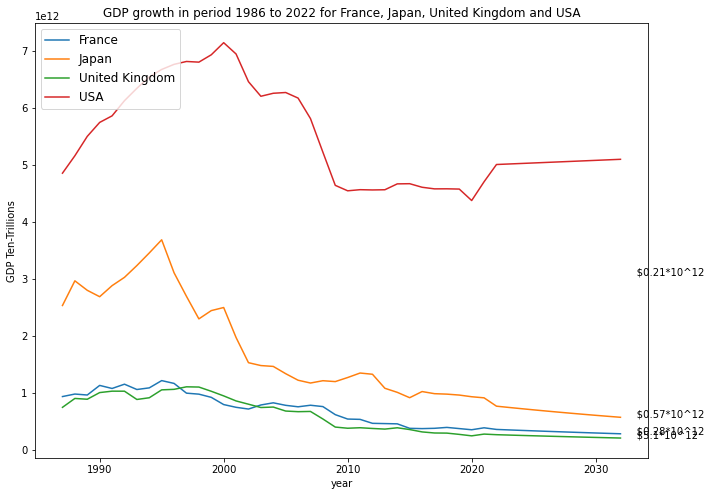

this is gdp adjusted for inflation since 1987 therefore it is held in constant dollars since 1987 prices


In [11]:
gdp_inflation_adjusted('France','Japan','United Kingdom','USA',36)